# CONCEIVE AN APP FOR THE PUBLIC HEALTH AGENCY: EXPLORATION PHASE

<div style="width:100%;text-align: center;"> <img align=middle src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/7d/Nutri-score-A.svg/220px-Nutri-score-A.svg.png" alt="Heat beating" style="height:200px;margin-top:3rem;"> </div>

The Nutri-Score, also known as the 5-Colour Nutrition label or 5-CNL, is a nutritional rating system that was selected by the French government in March 2017 to be displayed on food products after it was compared against several labels proposed by industry or retailers. It relies on the computation of a nutrient profiling system derived from the United Kingdom Food Standards Agency nutrient profiling system (FSA score).
When compared with other Front-of-Package labels, Nutri-Score emerged as the most efficient in conveying information on the nutritional quality of foods.

The nutritional score is calculated using the nutritional data listed on the package for 100 g of the product,
whose nutrients form part of the mandatory nutritional declaration or are included as supplemental
information:
- Calories (Kcal/KJ)
- Amount of fat (g)
- Amount of saturated fatty acids (g)
- Amount of carbohydrates (g)
- Amount of sugars (g)
- Amount of protein (g)
- Amount of salt (mg)
- Fibre (g)
<div style="width:100%;text-align: left;"> <img align=middle src="https://www.foodwatch.org/fileadmin/_processed_/1/c/csm_Nutri-Score_55cf817ed7.jpg" alt="Heat beating" style="height:400px;margin-top:3rem;"> </div>

### OBJECTIVE: Conception of the Appli NUTRISTEPH which returns - with just 1 picture of the nutrients composition - the NutriScore & NutriGrade for any product in the world, referenced or not.

## 2) EXPLORATION PHASE

In [118]:
#! usr/bin/env python 3
# coding: utf-8

# Importing librairies

import numpy as np                # linear algebra
import pandas as pd               # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy as sp                # numerical integration, interpolation, optimizatio & statistics
import scipy.stats as stats
import seaborn as sns             # statistical data visualization
import matplotlib.pyplot as plt   # static, animated, and interactive visualizations in Python
from matplotlib.collections import LineCollection
import statsmodels.formula.api as smf
import statsmodels.api as sm


### OVERVIEW OF THE CLEANED FILE

In [119]:
# Import the outpout file from the cleaning phases
#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

df_data_cleaned = pd.read_csv(r'C:\Users\steph\Documents\stephane\P3\cleaned_file.csv', low_memory=False, encoding='utf-_8')
df_data_cleaned = df_data_cleaned.drop(['Unnamed: 0'], axis=1)
df_data_cleaned['nutriscore_grade'] = df_data_cleaned['nutriscore_grade'].str.upper()
df_data_cleaned.head(2)

,code,url,creator,product_name,quantity,brands,ingredients_text,nutriscore_score,nutriscore_grade,pnns_groups_1,...,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,Countries
0,0000000000100,http://world-en.openfoodfacts.org/product/0000...,del51,moutarde au moût de raisin,100g,courte paille,eau graines de téguments de moutarde vinaigre ...,18.0,D,Fat and sauces,...,936.0,8.2,2.2,29.0,22.0,0.0,5.1,4.60,1.840,France
1,0000000000949,http://world-en.openfoodfacts.org/product/0000...,kiliweb,Salade de carottes râpées,NaN,NaN,NaN,1.0,B,Composite foods,...,134.0,0.3,0.1,5.3,3.9,NaN,0.9,0.42,0.168,France


In [120]:
from IPython.core.display import display, HTML

def display_side_by_side(dfs:list, captions:list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        #output += df.style.set_table_attributes.[{'selector': 'caption','props': 'caption-side: bottom; font-size:1.25em;'}]
        output += df.style.set_table_attributes("style='display:inline', font-weight: bold").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

### NUTRIGRADE & NUTRISCORE OVERVIEW

A Nutri-Score for a particular food item is given in one of five classification letters, with 'A' being a preferable score and 'E' being a detrimental score. The calculation of the score involves different parameters of nutrient information per 100g of food which are usually available on food packagings.

High content of fruits and vegetables, fibers, protein and healthy oils promote a preferable score, while high content of energy, sugar, saturated fatty acids, and sodium promote a detrimental score. In addition to the general calculation rules applied to most types of food, there are special rules for cheese, for “added fats” (fats that are meant as ingredients, such as vegetable oils or butter), and for beverages.
<div style="width:100%;text-align: center;"> <img align=middle src="https://nutriscore.colruytgroup.com/colruytgroup/img/nutriscore-table-en.png" alt="Heat beating" style="height:200px;margin-top:3rem;"> </div><br>

Focusing on Nutriscore & Nutrigrade first, the below boxplot shows good correlation between both parameters which means few errors on those combined parameters have been input by users.

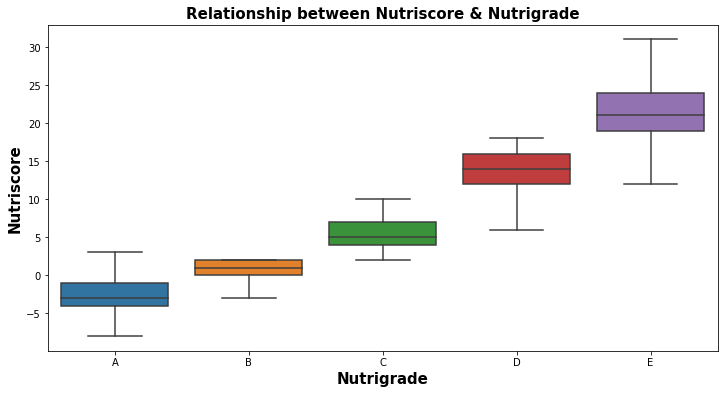

In [121]:
plt.figure(figsize=(12, 6))
rel = sns.boxplot(x='nutriscore_grade', y='nutriscore_score', data=df_data_cleaned.sort_values('nutriscore_score'), showfliers = False)
rel.axes.set_title("Relationship between Nutriscore & Nutrigrade", fontsize=15, weight = "bold")
rel.set_xlabel("Nutrigrade",fontsize=15, weight = "bold")
rel.set_ylabel("Nutriscore",fontsize=15, weight = "bold")
rel.tick_params(labelsize=10)
plt.show()

### NUTRISCORE/GRADE DISTRIBUTION IN THE DATASET

Text(0, 0.5, 'Number of products')

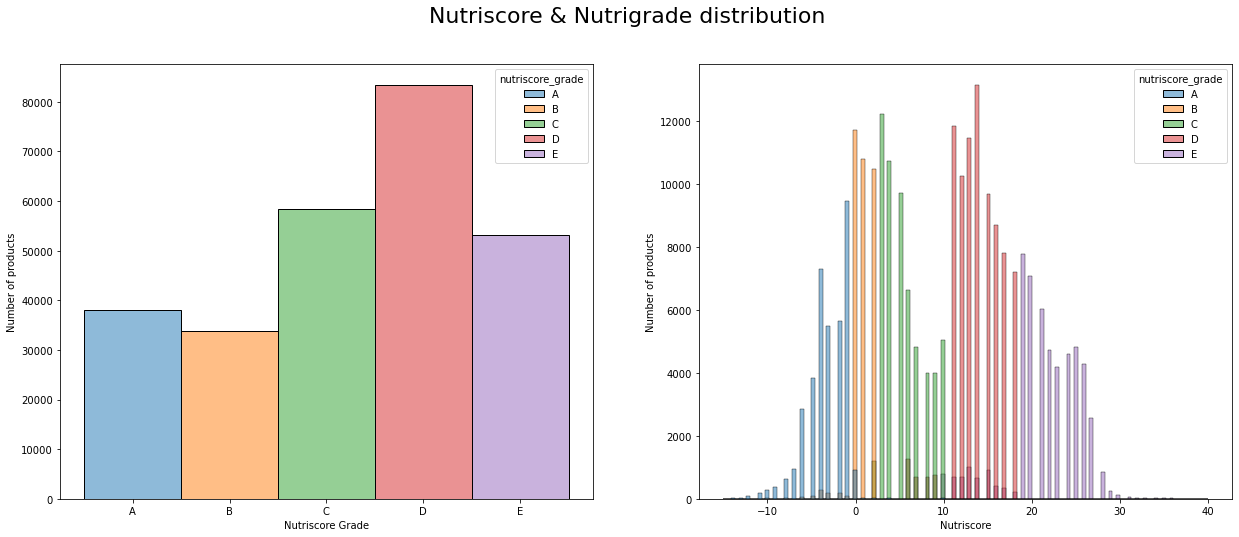

In [122]:
fig, axes = plt.subplots(1, 2, figsize=(21,8)) 
fig.suptitle(r"Nutriscore & Nutrigrade distribution", fontsize=22)

sns.histplot(data=df_data_cleaned.sort_values("nutriscore_grade"), x="nutriscore_grade", hue="nutriscore_grade", ax=axes[0])
axes[0].set_xlabel("Nutriscore Grade")
axes[0].set_ylabel("Number of products")

sns.histplot(data=df_data_cleaned.sort_values("nutriscore_grade"), x="nutriscore_score", hue="nutriscore_grade", ax=axes[1])
axes[1].set_xlabel("Nutriscore")
axes[1].set_ylabel("Number of products")

Most products (+80k) are classified into the D grade while grade A & B products are the less represented (<40k).

### FOCUS ON CATEGORIES OF PRODUCT: PNNS GROUPS

All these products are divided into few categories which can help us see more details about the classification.
Classification of individual products is made in 2 main National Nutrition and Health Program (PNNS) groups.

In [123]:
# Estimation of the number of products available per category in PNNS Group 1

cat_counts1 = df_data_cleaned['pnns_groups_1'].value_counts(dropna=True, sort=True)

df_cat_counts1 = pd.DataFrame(cat_counts1)
df_cat_counts1.index.name = 'Categories'
df_cat_counts1.columns = ['Number of records']

cat_counts2 = df_data_cleaned['pnns_groups_2'].value_counts(dropna=True, sort=True)
df_cat_counts2 = pd.DataFrame(cat_counts2)
df_cat_counts2.index.name = 'Categories'
df_cat_counts2.columns = ['Number of records']

df_cat_counts2['Percentage'] = (df_cat_counts2['Number of records'] / 
                  df_cat_counts2['Number of records'].sum()) * 100
df_cat_counts2['Percentage'] = df_cat_counts2['Percentage'].astype(float, errors = 'raise')
display_side_by_side([df_cat_counts1, df_cat_counts2.round(2)], ['PNNS 1', 'PNNS 2'])

,Number of records
Categories,
Sugary snacks,55840
Fish Meat Eggs,45664
Milk and dairy products,35710
Cereals and potatoes,26564
Composite foods,25810
Beverages,20052
Fat and sauces,19543
Salty snacks,18917
Fruits and vegetables,18859


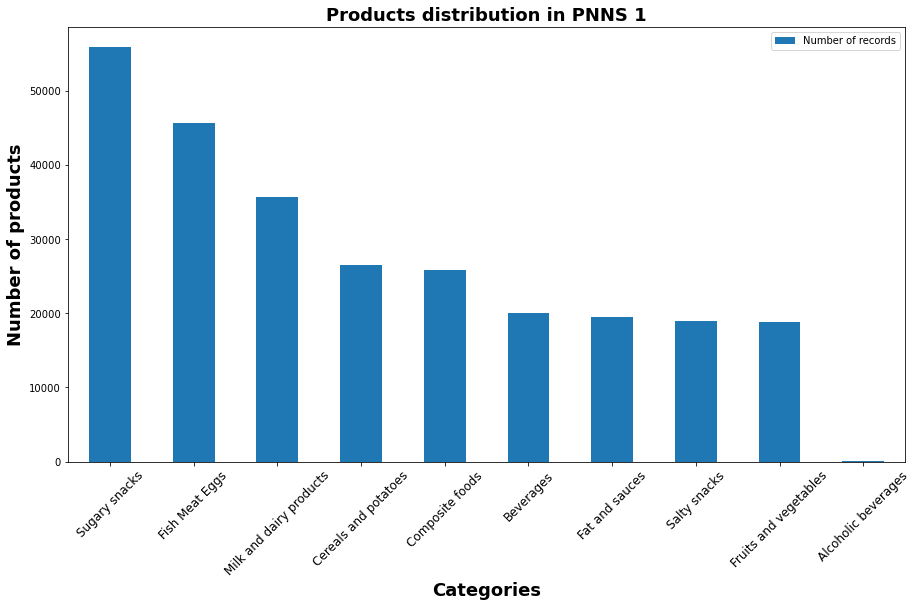

In [124]:
plt.rcParams["figure.figsize"] = (15,8)
res1 = df_cat_counts1.plot(kind='bar')
plt.title('Products distribution in PNNS 1', fontsize = 18, weight = 'bold')
plt.xlabel ('Categories', fontsize=18, weight = 'bold')
plt.ylabel ('Number of products', fontsize=18, weight = 'bold')
res1.set_xticklabels (res1.get_xmajorticklabels(), rotation = 45, fontsize = 12, va = "top")
plt.show()

The 365k+ products are classified into 10 main PNNS categories. Most of them are part of the sugary snacks, Fish Meat Eggs or Milk and dairy products.

### IMPACT OF PRODUCTS CATEGORY ON NUTRISCORE

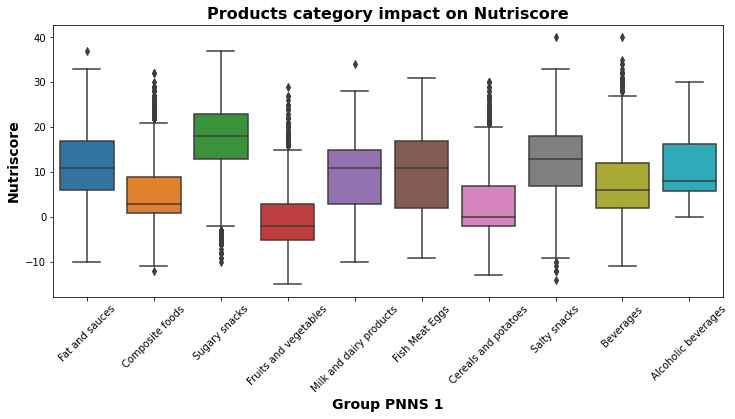

In [125]:
fig = plt.figure(figsize=(12,5))
ax = sns.boxplot(data=df_data_cleaned, x='pnns_groups_1', y='nutriscore_score')
plt.xlabel ('Group PNNS 1', fontsize=14, weight = 'bold')
plt.ylabel ('Nutriscore', fontsize=14, weight = 'bold')
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title("Products category impact on Nutriscore", weight = "bold", fontsize = 16)
plt.show()

### COMPOSITION OF PRODUCTS

Each individual product is composed by key factors: Nutrients.<br>
Nutrients are compounds in foods essential to life and health, providing us with energy, the building blocks for repair and growth and substances necessary to regulate chemical processes. Those vary in quantity in each product. 
As Open Food Facts is a free, online and crowdsourced database of food products, there are a lot of suspicious data input by users that we need to deal with:

1) Nutrients are based on a 100gr scale so any values above 100gr and below 0gr are surely erroneus<br>
2) Any value of satured fat higher than fat is not possible for a determined product<br>
https://healthyeating.sfgate.com/saturated-fats-unsaturated-fats-equal-total-fats-nutrition-labels-1578.html<br>
3) Any value of sodium higher than salt is not possible for a determined product. Actually salt (sodium chloride) is 40% sodium, so that for every 2.5g of salt consumed, 1g is sodium.
https://www.sciencedaily.com/releases/2017/09/170914210621.htm#:~:text=Salt%20(sodium%20chloride)%20is%2040,blood%20pressure%20and%20weight%20gain.<br>
4) Fats have the greatest amount of food energy per mass, 37 kJ/g i.e. all values of energy higher than 3700kJ/100g are surely wrong<br>
https://en.wikipedia.org/wiki/Food_energy


In [126]:
# Set up boundaries for nutrients values within the dataset

var_names = [ 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
             'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g']

nutrients = df_data_cleaned[var_names]
df_data_cleaned = df_data_cleaned[~((nutrients > 100) | (nutrients < 0)).any(axis=1)]

df_data_cleaned = df_data_cleaned.loc[~((nutrients == 0) | (nutrients.isnull())).all(axis=1)]

df_data_cleaned = df_data_cleaned[~((nutrients['saturated-fat_100g'] > nutrients['fat_100g']) 
                                | (nutrients['sodium_100g'] > nutrients['salt_100g']))]
df_data_cleaned = df_data_cleaned[df_data_cleaned['energy_100g'] < 3700]
round(df_data_cleaned.describe(), 2)


<ipython-input-126-75edb0cd029e>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_data_cleaned = df_data_cleaned[~((nutrients['saturated-fat_100g'] > nutrients['fat_100g'])


,nutriscore_score,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
count,261908.00,261908.00,261897.00,261900.00,261813.00,261904.00,93625.00,261900.00,261902.00,261902.00
mean,9.51,1152.65,15.08,5.97,24.71,12.34,2.82,9.19,1.02,0.41
std,8.85,756.43,17.27,8.31,26.59,18.32,4.14,8.55,1.89,0.76
min,-15.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2.00,502.00,1.60,0.40,2.00,0.60,0.40,2.40,0.10,0.04
50%,10.00,1067.00,9.30,2.40,12.00,3.10,1.70,6.70,0.64,0.26
75%,16.00,1674.00,24.00,9.00,49.00,16.00,3.60,14.00,1.35,0.54
max,40.00,3699.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,40.00


### DATA AVAILABLE FOR NUTRIENTS IN DATAFRAME

In [127]:
# Creation of a special dataframe for nutrients + energy data in dataframe
var_name_ener = [ 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
                          'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'energy_100g']
df_nutri = df_data_cleaned[var_name_ener]
df_non_nutri = df_data_cleaned[df_data_cleaned.columns.difference(['fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
                          'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'energy_100g'])]
available_data = df_nutri.notnull().sum() * 100 / len(df_nutri)
available_data_df = pd.DataFrame({'Column label': df_nutri.columns,
                                 'Existing data pct': available_data})
available_data_df.reset_index(drop=True, inplace=True)
available_data_df.sort_values('Existing data pct', ascending=False, inplace=True)
available_data_df.index = np.arange(1, len(available_data_df)+1)
available_data_df['Existing data pct'] = available_data_df['Existing data pct'].astype(float, errors = 'raise')
round(available_data_df, 2)


,Column label,Existing data pct
1,energy_100g,100.00
2,sugars_100g,100.00
3,salt_100g,100.00
4,sodium_100g,100.00
5,saturated-fat_100g,100.00
6,proteins_100g,100.00
7,fat_100g,100.00
8,carbohydrates_100g,99.96
9,fiber_100g,35.75


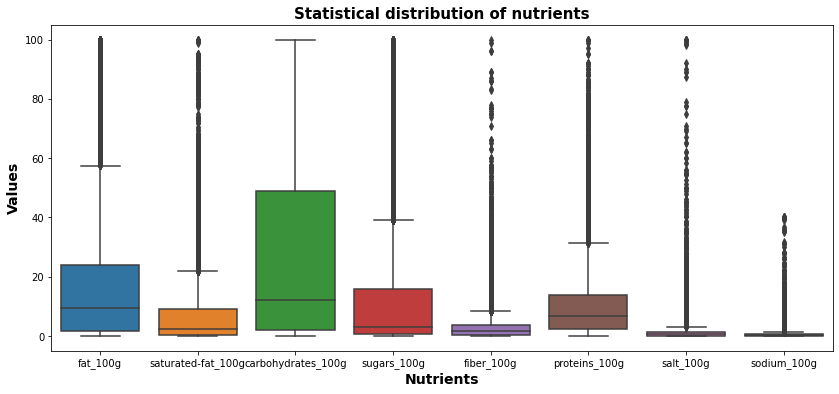

In [128]:
fig = plt.figure(figsize=(14,6))
ax = sns.boxplot(data=df_nutri.loc[:, df_nutri.columns != 'energy_100g']) #, showfliers = False)
ax.axes.set_title("Statistical distribution of nutrients", fontsize=15, weight = "bold")
ax.set_xlabel("Nutrients", fontsize=14, weight = "bold")
ax.set_ylabel("Values", fontsize=14, weight = "bold")
ax.tick_params(labelsize=10)
plt.show()

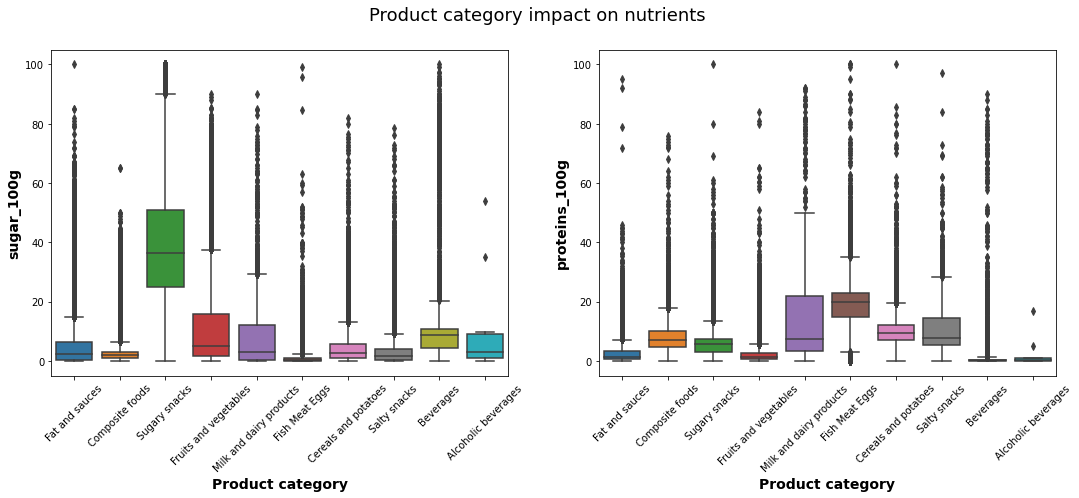

In [129]:
fig, axes = plt.subplots(1, 2, figsize=(18,6)) 
fig.suptitle(r"Product category impact on nutrients", fontsize=18)

sns.boxplot(data=df_data_cleaned, x='pnns_groups_1', y='sugars_100g', ax=axes[0])
axes[0].set_xlabel("Product category", fontsize=14, weight = "bold")
axes[0].set_ylabel("sugar_100g", fontsize=14, weight = "bold")
axes[0].set_xticklabels(axes[0].get_xmajorticklabels(), fontsize = 10, rotation=45)

sns.boxplot(data=df_data_cleaned, x='pnns_groups_1', y='proteins_100g', ax=axes[1])
axes[1].set_xlabel("Product category", fontsize=14, weight = "bold")
axes[1].set_ylabel("proteins_100g", fontsize=14, weight = "bold")
axes[1].set_xticklabels(axes[1].get_xmajorticklabels(), fontsize = 10, rotation=45)

plt.show()

### MULTIVARIATE ANALYSIS

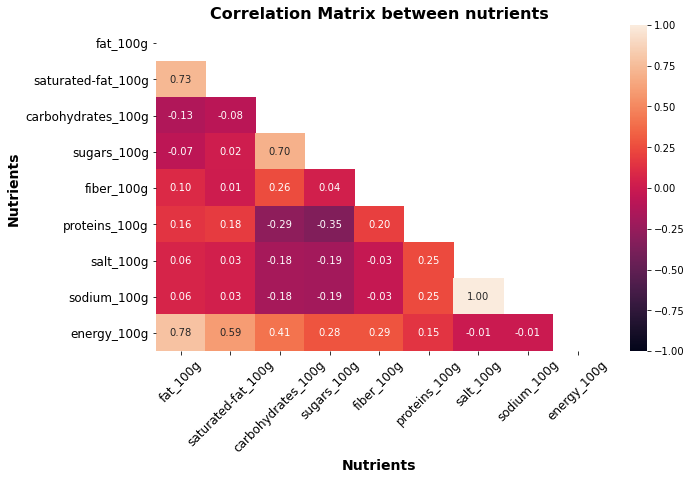

In [130]:
#CORRELATION MATRIX: Investigation of the dependence between all nutrients + energy 

correlation_mat = df_nutri.corr()

plt.figure(figsize=(10,6))
tricor = np.triu(correlation_mat)
res = sns.heatmap(correlation_mat, vmin=-1, vmax=1, center= None, annot = True, fmt='.2f', annot_kws={"size": 10}, mask=tricor)
plt.title('Correlation Matrix between nutrients', fontsize = 16, weight = 'bold')
plt.xlabel ('Nutrients', fontsize=14, weight = 'bold')
plt.ylabel ('Nutrients', fontsize=14, weight = 'bold')
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 12, rotation=45)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 12, rotation=0)

plt.show()

The above matrix teaches us few things about the dependence of the nutrients:

Perfect positive correlation: __Salt & sodium__

Strong positive correlation: __Energy, fat and saturated fat__

Relatively strong positive correlation: __Carbohydrates & sugars__

Relatively strong positive correlation: __Carbohydrates & fibers__

Weak positive correlation: __Proteins & salt/sodium__

No correlation: __Sugars & fibers__


### Interactions between continuous variables using seaborn pairplot

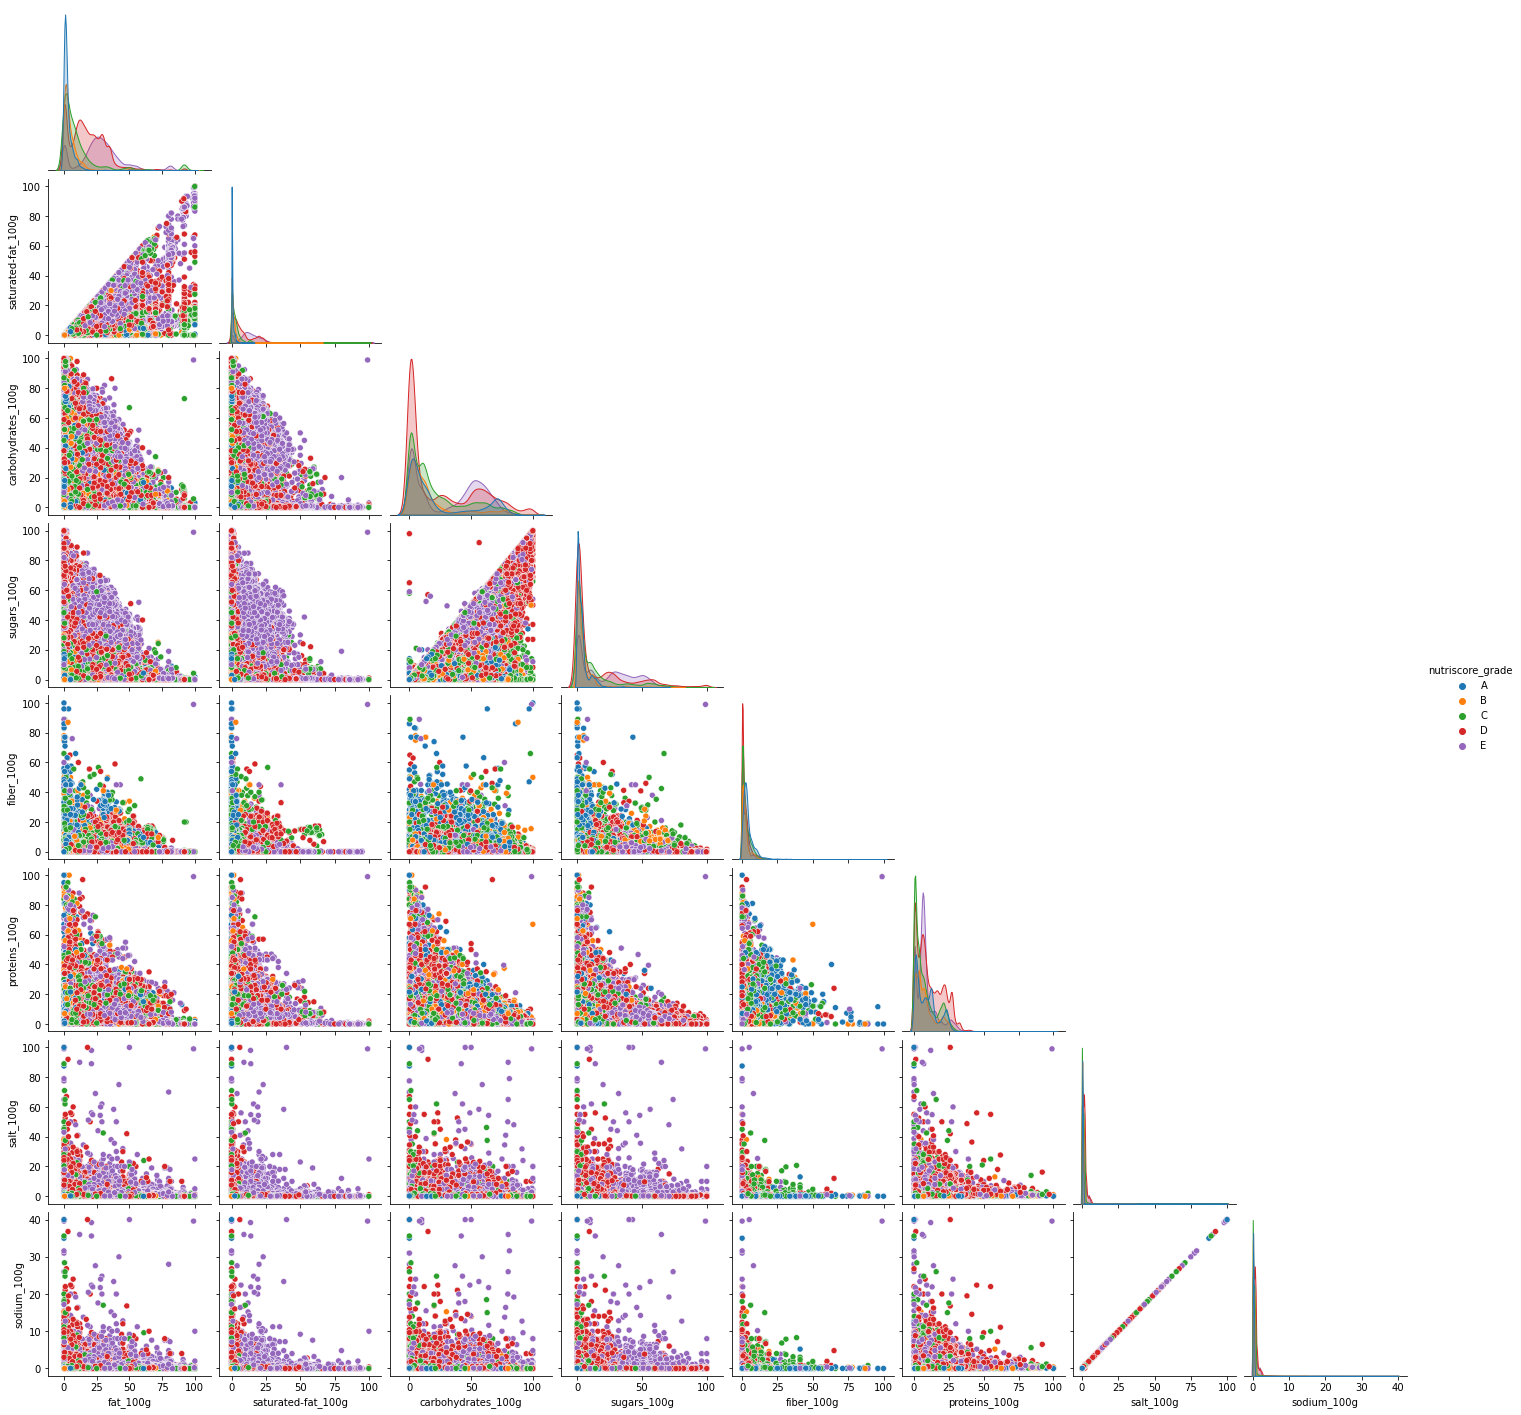

In [131]:
ax = sns.pairplot(df_data_cleaned, vars=var_names, hue = "nutriscore_grade", hue_order=['A', 'B', 'C', 'D', 'E'], corner=True)
plt.show()

NEW


### LOOKING FOR A PERFECT FIT 

In order to create a regression model that can relate the nutrients to the Nutriscore, a baseline model will be built to get a basis for comparison. A linear regression will then be computed and compared to the baseline to check any improvement in our model.<br>

Step 1: __DATA SELECTION__

In [132]:
# Data Selection 
y = df_data_cleaned['nutriscore_score'].values
X = df_data_cleaned[var_name_ener].fillna(0)
X.drop(['sodium_100g'], axis=1, inplace=True)

Step 2: __STANDARDIZATION__<br>

StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation. StandardScaler results in a distribution with a standard deviation equal to 1. 

In [133]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

Step 3: __TRAIN-TEST SPLIT EVALUATION__<br>

The procedure involves taking a dataset and dividing it into two subsets. The first subset is used to fit the model and is referred to as the training dataset. The second subset is not used to train the model; instead, the input element of the dataset is provided to the model, then predictions are made and compared to the expected values. This second dataset is referred to as the test dataset.<br>
The objective is to estimate the performance of the machine learning model on new data: data not used to train the model.

In [134]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

Step 4: __BASELINE CREATION__<br>

The Dummy Regressor is a kind of Regressor that gives prediction based on simple strategies without paying any attention to the input Data. The sklearn library provides Dummy Regressor which is used to set up a baseline for comparing Linear Regression for instance. Training the dummy model is similar to training any regular regression model, except for the strategies. The main role of strategy is to predict target values without any influence of the training data. We are here using the strategy "mean" which is the default strategy used by the Dummy Regressor. It always predicts the mean of the training target values.

In [135]:
from sklearn.dummy import DummyRegressor
dummy_reg = DummyRegressor(strategy="mean")
dummy_reg.fit(X_train, y_train)
dummy_pred = dummy_reg.predict(X_test)

To evaluate our regression model, we compute few meaningful prameters to estimate how far our predictions are from the actual data:

__MAE__ is the sum of absolute differences between our target and predicted variables.<br>
__MSE__ measures the average squared difference between the estimated values and the actual value.<br>
__RMSE__ is the standard deviation of the residuals.<br>
__RSS__ is the residuals sum of squares.<br>
__R²__ is the coefficient of determination and evaluates the scatter of the data points around the fitted regression line.

In [136]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def algo_model(y_actual, y_forecast):
    """Return metrics for model evaluation in regression"""
    
    y_actual, y_forecast = np.array(y_actual), np.array(y_forecast)
    mae = mean_absolute_error(y_actual, y_forecast)
    rss = np.sum((y_actual - y_forecast)**2)
    mse = mean_squared_error(y_actual, y_forecast)
    rmse = np.sqrt(mse)
    functions = {"Functions":["Min Absolute Error (MAE)", "Residual Sum of Squares (RSS)",
                              "Mean Squared Error (MSE)", "Root Mean Squared Error (RMSE)",
                              "Coefficient of determination (R²)"],
                              "Results":[mae, rss, mse, rmse, r2_score(y_actual, y_forecast)]}
    df_functions = pd.DataFrame(functions) 
    return df_functions

dummy_metrics = algo_model(y_test, dummy_pred).rename(columns={'Results':'Baseline'})
dummy_metrics.index = np.arange(1, len(dummy_metrics)+1)
round(dummy_metrics, 3)

,Functions,Baseline
1,Min Absolute Error (MAE),7.617
2,Residual Sum of Squares (RSS),6126747.542
3,Mean Squared Error (MSE),77.975
4,Root Mean Squared Error (RMSE),8.830
5,Coefficient of determination (R²),-0.000


As can be seen from the above result, the expected Dummy Regressor always predict the R² score as 0, since it is always predicting a constant without having an insight of the output. This baseline will be a useful point for comparison with our linear regression.

### Linear regression implementation and comparison with our baseline

In [137]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train, y_train)
regr_forecast = regr.predict(X_test)
regr_metrics = algo_model(y_test, regr_forecast).rename(columns={'Results':'Linear Regression'})
regr_metrics.index = np.arange(1, len(regr_metrics)+1)
regr_metrics = pd.concat([dummy_metrics,regr_metrics['Linear Regression']], axis=1)
round(regr_metrics, 2)


,Functions,Baseline,Linear Regression
1,Min Absolute Error (MAE),7.62,4.13
2,Residual Sum of Squares (RSS),6126747.54,2154462.64
3,Mean Squared Error (MSE),77.98,27.42
4,Root Mean Squared Error (RMSE),8.83,5.24
5,Coefficient of determination (R²),-0.00,0.65


As seen in this table, the coefficient of determination R² is much better than for the baseline which indicates that the performed linear regression is a better fit for our data but still far away from a golden solution which would approach 1 in ideal conditions. Plotting the acual data vs. the forecasts, we can have a display of the trends of the data.

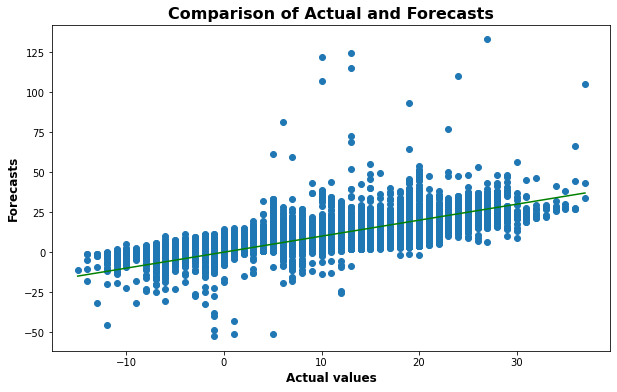

In [138]:
def forecast_comp(y_actual, y_forecast):
    X_plot = [y_actual.min(), y_actual.max()]
    fig = plt.figure(figsize=(10,6))
    plt.scatter(y_actual, y_forecast)
    plt.plot(X_plot, X_plot, color='g')
    plt.xlabel("Actual values", weight = "bold", fontsize=12)
    plt.ylabel("Forecasts", weight = "bold", fontsize=12)
    plt.title("Comparison of Actual and Forecasts", weight = "bold", fontsize=16)
    plt.show()
forecast_comp(y_actual=y_test, y_forecast = regr_forecast)


Scattered data potentially due to outliers (scale -15/40 vs. -50/130 ).

### ANalysis Of VAriance (ANOVA)

A one way ANOVA is used to compare two means from two independent (unrelated) groups using the F-distribution.<br> The null hypothesis for the test is that the two means are equal. Therefore, a significant result means that the two means are unequal.<br>
To determine whether any of the differences between the means are statistically significant, we compare the p-value to our significance level to assess the null hypothesis. The null hypothesis states that the population means are all equal. Usually, a significance level (denoted as α or alpha) of 0.05 works well. A significance level of 0.05 indicates a 5% risk of concluding that a difference exists when there is no actual difference.

In [139]:
anova_table = smf.ols('nutriscore_score~pnns_groups_1', data=df_data_cleaned).fit()
print(anova_table.summary())

                            OLS Regression Results                            
Dep. Variable:       nutriscore_score   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                 1.666e+04
Date:                Mon, 09 Aug 2021   Prob (F-statistic):               0.00
Time:                        20:40:04   Log-Likelihood:            -8.8343e+05
No. Observations:              261908   AIC:                         1.767e+06
Df Residuals:                  261898   BIC:                         1.767e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [140]:
sm.stats.anova_lm(anova_table, typ=2)

,sum_sq,df,F,PR(>F)
pnns_groups_1,7.467695e+06,9.0,16657.129684,0.0
Residual,1.304596e+07,261898.0,NaN,NaN


Results indicate a p-value of 0.0 which is less than our significance level of 0.05 which means that the category of products has an impact on the Nutriscore. Integrating PPNS groups in our regression could give accuracy to our prediction model.


### SECOND LINEAR REGRESSION: ONE HOT ENCODING

In order to improve our linear regression, we'll incorporate categorical variables "pnns groups" and check if it gives values/improvement from our former linear regression.
A one hot encoding is a representation of categorical variables as binary vectors.
This first requires that the categorical values be mapped to integer values.
Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1. <br>


In [141]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

nutrients = list(X.columns)
scaler = StandardScaler()

# We incorporate Group PNNS 1 in the regression

catego = list(['pnns_groups_1'])
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(transformers=
                                 [('num', scaler, nutrients),
                                  ('cat', categorical_transformer, catego)])

pipe = Pipeline(steps=[('preprocessor', preprocessor),
                             ('regressor', LinearRegression())])

X1 = df_data_cleaned[nutrients + catego]
X1 = X1.fillna(0)
y1 = df_data_cleaned['nutriscore_score']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

pipe.fit(X1_train, y1_train)
cat1_forec = pipe.predict(X1_test)

cat1_metrics = algo_model(y1_test, cat1_forec).rename(columns={'Results':'LinearRegression pnns1'})
cat1_metrics.index = np.arange(1, len(cat1_metrics)+1)
cat1_metrics = pd.concat([regr_metrics,cat1_metrics['LinearRegression pnns1']], axis=1)

# We incorporate Group PNNS 1 & 2 in the regression

pnns = list(['pnns_groups_1', 'pnns_groups_2'])
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(transformers=
                                 [('num', scaler, nutrients),
                                  ('cat', categorical_transformer, pnns)])

pipe1 = Pipeline(steps=[('preprocessor', preprocessor),
                             ('regressor', LinearRegression())])


X2 = df_data_cleaned[nutrients + pnns]
X2 = X2.fillna(0)
y2 = df_data_cleaned['nutriscore_score']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

pipe1.fit(X2_train, y2_train)
cat12_forec = pipe1.predict(X2_test)

cat12_metrics = algo_model(y2_test, cat12_forec).rename(columns={'Results':'LinearRegression pnns1&2'})
cat12_metrics.index = np.arange(1, len(cat12_metrics)+1)
cat12_metrics = pd.concat([cat1_metrics,cat12_metrics['LinearRegression pnns1&2']], axis=1)

round(cat12_metrics, 3)


,Functions,Baseline,Linear Regression,LinearRegression pnns1,LinearRegression pnns1&2
1,Min Absolute Error (MAE),7.617,4.132,3.591,2.697
2,Residual Sum of Squares (RSS),6126747.542,2154462.644,1685957.864,1050170.859
3,Mean Squared Error (MSE),77.975,27.420,21.457,13.366
4,Root Mean Squared Error (RMSE),8.830,5.236,4.632,3.656
5,Coefficient of determination (R²),-0.000,0.648,0.725,0.829


As seen on the above table, taking into account the category of products PNNS 1 & 2 increases the accuracy of our regression.<br> A coefficient of determination of __0.829__ is reached which is much better than the initial __0.648__.<br> There is still room for improvement in our regreesion: as seen previously, a number of outliers were identified.<br> Amongst them, some are wrong info input by users, some are correct in terms of values.<br> All sugar products have 100mg of sugars, all pure oils have 100mg of fat, all salt have 100mg...<br>
A new regression could be performed without taking into account these outliers in order to see the impact of these products on the coefficient of determination.

__IDENTIFYING OUTLIERS WITH INTERQUANTILE RANGE (IQR)__

This technique uses the IQR scores to remove outliers. The rule of thumb is that anything not in the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier, and can be removed.
After this process, around 60k products over 265k products are removed.

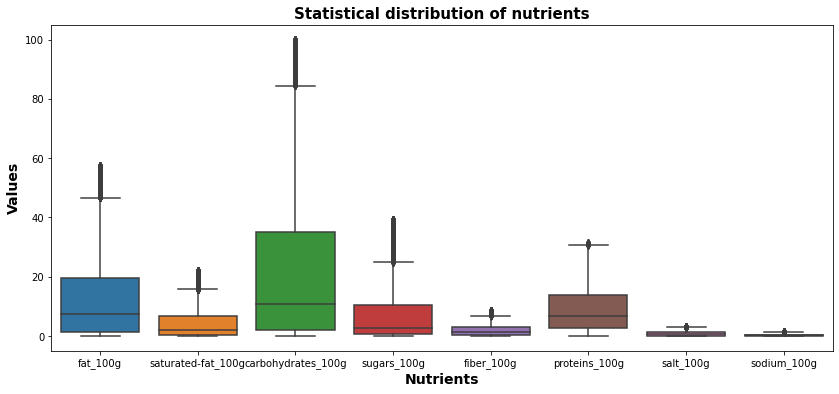

In [142]:
Q1 = df_nutri.quantile(0.25)
Q3 = df_nutri.quantile(0.75)
IQR = Q3 - Q1
df_out_nutri = df_nutri[~((df_nutri < (Q1 - 1.5 * IQR)) |(df_nutri > (Q3 + 1.5 * IQR))).any(axis=1)]

fig = plt.figure(figsize=(14,6))
ax = sns.boxplot(data=df_out_nutri.loc[:, df_out_nutri.columns != 'energy_100g']) #, showfliers = False)
ax.axes.set_title("Statistical distribution of nutrients", fontsize=15, weight = "bold")
ax.set_xlabel("Nutrients", fontsize=14, weight = "bold")
ax.set_ylabel("Values", fontsize=14, weight = "bold")
ax.tick_params(labelsize=10)
plt.show()

### DATAFRAME RECONSTRUCTION WITH OUTLIERS REMOVED

In [143]:
merged = df_non_nutri.merge(df_out_nutri, left_index=True, right_index=True, how='inner')
merged.shape

(197178, 28)

After removing these outliers, the number of products decreases from 265k to 197k.

### LINEAR REGRESSION WITHOUT OUTLIERS


We perform the same regression steps to evaluate the impact of these outliers on our fit.

In [144]:
# Data Selection 
ybis = merged['nutriscore_score'].values
Xbis = merged[var_name_ener].fillna(0)
Xbis.drop(['sodium_100g'], axis=1, inplace=True)

In [145]:
# Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(Xbis)
Xbis_scaled = scaler.transform(Xbis)

In [146]:
# Splitting the data into training and testing data
from sklearn.model_selection import train_test_split
Xbis_train, Xbis_test, ybis_train, ybis_test = train_test_split(Xbis_scaled, ybis, test_size=0.3, random_state=42)

In [147]:
from sklearn.dummy import DummyRegressor
dummy_reg = DummyRegressor(strategy="mean")
dummy_reg.fit(Xbis_train, ybis_train)
dummy_pred = dummy_reg.predict(Xbis_test)

In [148]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def algo_model(ybis_actual, ybis_forecast):
    """Return metrics for model evaluation in regression"""
    
    ybis_actual, ybis_forecast = np.array(ybis_actual), np.array(ybis_forecast)
    mae = mean_absolute_error(ybis_actual, ybis_forecast)
    rss = np.sum((ybis_actual - ybis_forecast)**2)
    mse = mean_squared_error(ybis_actual, ybis_forecast)
    rmse = np.sqrt(mse)
    functions = {"Functions":["Min Absolute Error (MAE)", "Residual Sum of Squares (RSS)",
                              "Mean Squared Error (MSE)", "Residual Mean Squared Error (RMSE)",
                              "Coefficient of determination (R²)"],
                              "Results":[mae, rss, mse, rmse, r2_score(ybis_actual, ybis_forecast)]}
    df_functions = pd.DataFrame(functions) 
    return df_functions

baseline_metrics1 = algo_model(ybis_test, dummy_pred).rename(columns={'Results':'Baseline'})
baseline_metrics1.index = np.arange(1, len(baseline_metrics1)+1)
round(baseline_metrics1, 3)

,Functions,Baseline
1,Min Absolute Error (MAE),7.238
2,Residual Sum of Squares (RSS),4051830.904
3,Mean Squared Error (MSE),68.496
4,Residual Mean Squared Error (RMSE),8.276
5,Coefficient of determination (R²),-0.000


In [149]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(Xbis_train, ybis_train)
regr_forecast = regr.predict(Xbis_test)
regr_metrics = algo_model(ybis_test, regr_forecast).rename(columns={'Results':'Linear Regression'})
regr_metrics.index = np.arange(1, len(regr_metrics)+1)
regr_metrics = pd.concat([dummy_metrics,regr_metrics['Linear Regression']], axis=1)
round(regr_metrics, 2)


,Functions,Baseline,Linear Regression
1,Min Absolute Error (MAE),7.62,2.71
2,Residual Sum of Squares (RSS),6126747.54,781408.83
3,Mean Squared Error (MSE),77.98,13.21
4,Root Mean Squared Error (RMSE),8.83,3.63
5,Coefficient of determination (R²),-0.00,0.81


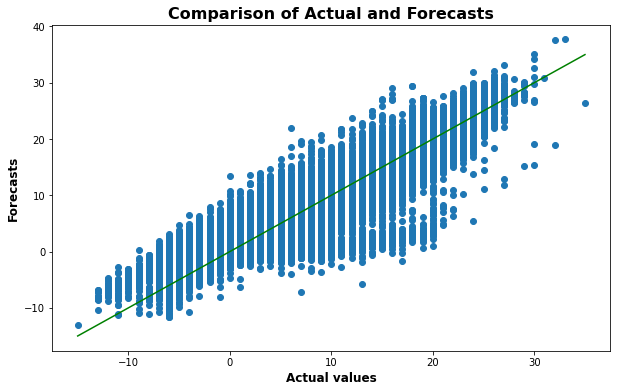

In [150]:
def forecast_comp(ybis_actual, ybis_forecast):
    Xbis_plot = [ybis_actual.min(), ybis_actual.max()]
    fig = plt.figure(figsize=(10,6))
    plt.scatter(ybis_actual, ybis_forecast)
    plt.plot(Xbis_plot, Xbis_plot, color='g')
    plt.xlabel("Actual values", weight = "bold", fontsize=12)
    plt.ylabel("Forecasts", weight = "bold", fontsize=12)
    plt.title("Comparison of Actual and Forecasts", weight = "bold", fontsize=16)
    plt.show()
forecast_comp(ybis_actual=ybis_test, ybis_forecast = regr_forecast)

### SECOND LINEAR REGRESSION: ONE HOT ENCODING

In [151]:

nutrients0 = list(Xbis.columns)
scaler = StandardScaler()

# We incorporate Group PNNS 1 in the regression

catego = list(['pnns_groups_1'])
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(transformers=
                                 [('num', scaler, nutrients0),
                                  ('cat', categorical_transformer, catego)])

pipe = Pipeline(steps=[('preprocessor', preprocessor),
                             ('regressor', LinearRegression())])

X3 = merged[nutrients0 + catego]
y3 = merged['nutriscore_score']
X3 = X3.fillna(0)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=42)

pipe.fit(X3_train, y3_train)
cat3_forec = pipe.predict(X3_test)

cat3_metrics = algo_model(y3_test, cat3_forec).rename(columns={'Results':'LinearRegression pnns1'})
cat3_metrics.index = np.arange(1, len(cat3_metrics)+1)
cat3_metrics = pd.concat([regr_metrics,cat3_metrics['LinearRegression pnns1']], axis=1)

# We incorporate Group PNNS 1 & 2 in the regression

pnns = list(['pnns_groups_1', 'pnns_groups_2'])

preprocessor = ColumnTransformer(transformers=
                                 [('num', scaler, nutrients),
                                  ('cat', categorical_transformer, pnns)])

pipe = Pipeline(steps=[('preprocessor', preprocessor),
                             ('regressor', LinearRegression())])

X4 = merged[nutrients + pnns]
X4= X4.fillna(0)
y4 = merged['nutriscore_score']

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.3, random_state=42)

pipe.fit(X4_train, y4_train)
cat34_forec = pipe.predict(X4_test)

cat34_metrics = algo_model(y4_test, cat34_forec).rename(columns={'Results':'LinearRegression pnns1&2'})
cat34_metrics.index = np.arange(1, len(cat34_metrics)+1)
cat34_metrics = pd.concat([cat3_metrics,cat34_metrics['LinearRegression pnns1&2']], axis=1)

round(cat34_metrics, 3)


,Functions,Baseline,Linear Regression,LinearRegression pnns1,LinearRegression pnns1&2
1,Min Absolute Error (MAE),7.617,2.708,2.056,1.662
2,Residual Sum of Squares (RSS),6126747.542,781408.834,436946.678,291374.898
3,Mean Squared Error (MSE),77.975,13.210,7.387,4.926
4,Root Mean Squared Error (RMSE),8.830,3.635,2.718,2.219
5,Coefficient of determination (R²),-0.000,0.807,0.892,0.928


A coefficient of determination of 0.93 was achieved after incorporating PNNS groups to our regression which indicates that 93% of the data fit the regression model.

## PRINCIPAL COMPONENT ANALYSIS

Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

Reducing the number of variables of a data set naturally comes at the expense of accuracy, but the trick in dimensionality reduction is to trade a little accuracy for simplicity. Because smaller data sets are easier to explore and visualize and make analyzing data much easier and faster for machine learning algorithms without extraneous variables to process.

In [152]:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # 3 first factorial plans displayed i.e the first 6 componants
        if d2 < n_comp:

            # plot initialisation 
            fig, ax = plt.subplots(figsize=(7,6))

            # Limits of the plot fixed
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # Arrows display
            # If more than 30 arrows, triangle not displayed
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # Variable names displayed  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # Circle display
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # Plot limits definition
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # Horizontal and vertical lines display
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("PCA Correlation circle (F{} & F{})".format(d1+1, d2+1))
            plt.show(block=False)
        


def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("Principal Component Values")
    plt.ylabel("Percentage Explained Variance")
    plt.title("Scree plot")
    plt.show(block=False)

In [153]:
# Transforming Nutrigrades into numbers [A=1, B=2, C=3, D=4, E=5] 

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Illustr_var = le.fit_transform(df_data_cleaned['nutriscore_grade'])

A scree plot is a graphical tool used in the selection of the number of relevant components or factors to be considered in a principal components analysis (PCA).


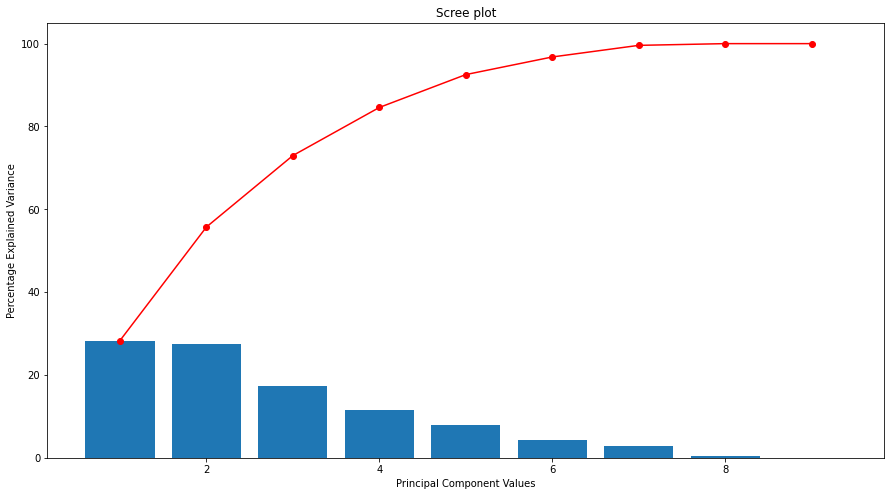

In [154]:
from sklearn import decomposition
from sklearn import preprocessing
#from functions import *

# choix du nombre de composantes à calculer
n_comp = 9

# selection des colonnes à prendre en compte dans l'ACP
data_pca = df_data_cleaned[["energy_100g","proteins_100g","carbohydrates_100g","fat_100g",
                         "saturated-fat_100g","salt_100g","sodium_100g","sugars_100g","fiber_100g"]]

# préparation des données pour l'ACP
#data_pca = data_pca.fillna(data_pca.mean())
data_pca = data_pca.fillna(0)
X = data_pca.values
names = df_data_cleaned['nutriscore_grade'] #["idCours"] # ou data.index pour avoir les intitulés
features = data_pca.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)

plt.show()

The scree plot above indicates that the first 2 PC F1 & F2 cover ~55% of the information and that F3 & F4 cover ~30% i.e. ~85% of the information is covered by the first 2 factor plans.


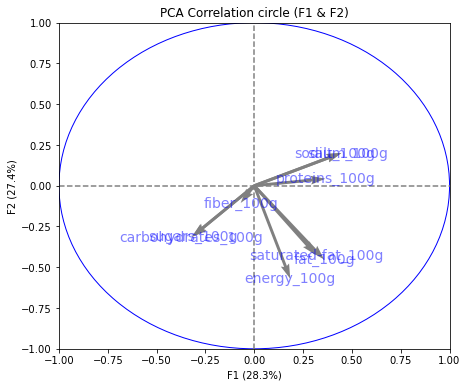

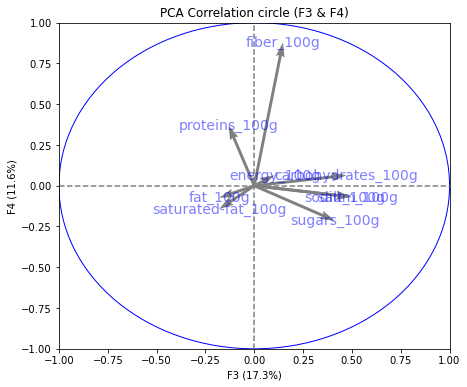

In [155]:
# Correlation circle
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3)], labels = np.array(features))

In [156]:
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(7,6))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Individuals factor map - PCA (on F{} & F{})".format(d1+1, d2+1))
            plt.show(block=False)

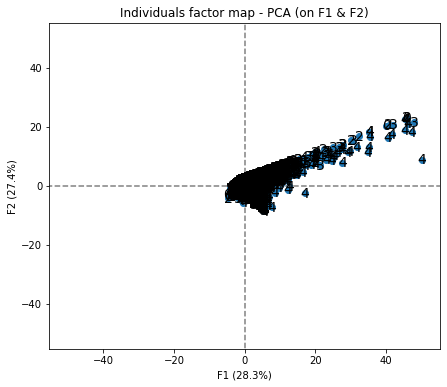

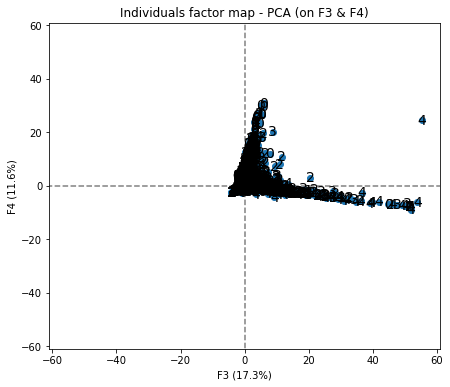

In [157]:
# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3)], Illustr_var)

plt.show()

PCA was only informative. Reducing dimensionality would make the coefficient of determination drop and would altere the quality of our fit. Successive regressions without few parameters proved it.